In [ ]:
pip install mlxtend

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

                                                   0
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...
(7501, 1)
    asparagus  almonds  antioxydant juice  ...   yams  yogurt cake  zucchini
0       False     True               True  ...   True        False     False
1       False    False              False  ...  False        False     False
2       False    False              False  ...  False        False     False
3       False    False              False  ...  False        False     False
4       False    False              False  ...  False        False     False

[5 rows x 120 columns]

There are 2 Relation derived.

         antecedents     consequents  ...  certainty  kulczynski
0         (burgers)          (eggs)  ...   0.183552    0.245256
1            (eggs)      

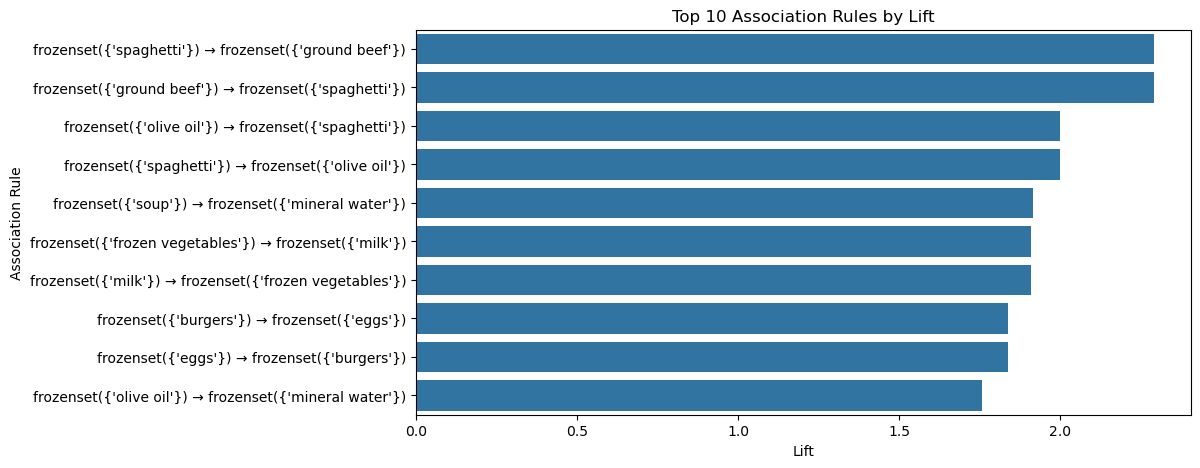

In [13]:
def Association_Rules():
    try:
        store_data = pd.read_excel("Online retail.xlsx",header=None)

        print(store_data.head())
        print(store_data.shape)

        #Data Processing handle missing value
        store_data = store_data.dropna()

        #Convert Data into a list of lists
        transactions = store_data[0].apply(lambda x: x.split(','))
        transactions = transactions.tolist()

        #Remove Duplicate
        transactions = [list(set(t)) for t in transactions]    

        #Apply one hot encoding ( if required)
        te  = TransactionEncoder()
        te_ary = te.fit(transactions).transform(transactions)
        df_encoded = pd.DataFrame(te_ary, columns = te.columns_)

        print(df_encoded.head())

        #Implement association rule mining
        #Apply apriori algorithm with a minimum support threshold
        frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
        association_results = list(frequent_itemsets)
        print("\nThere are {} Relation derived.".format(len(association_results)))

        #Generate association rules with confidence and lift threshold
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
        print("\n",rules)

        #Sort rules by confidence
        rules = rules.sort_values(by="confidence", ascending=False)

        #Display the results
        print(rules[['antecedents','consequents','support','confidence','lift']])

        filtered_rules = rules[(rules['confidence']>0.1) & (rules['lift']>1.0)]
        filtered_rules.sort_values(by='lift',ascending=False)

        #Sort rules by lift
        top_rules = filtered_rules.nlargest(10, 'lift')

        plt.figure(figsize=(10,5))
        sns.barplot(x=top_rules['lift'],y=top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str))
        plt.xlabel('Lift')
        plt.ylabel('Association Rule')
        plt.title('Top 10 Association Rules by Lift')
        plt.show()


    except FileNotFoundError():
        print("Error")

Association_Rules()